In [1]:
# Generate data using numpy
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
# multi-variate normal distribution
# Cluster 0
mean_01 = np.array([1, 0.5]) # Dependent on 2 features, x1 and x2 - feature x1 mean and feature x2 mean
cov_01 = np.array([[1, 0.1], [0.1,1.2]]) # feature x1 individual variance, feature x1-feature x2 co-variance, feature x1-feature x2 co-variance and feature x2 individual variance.
# Cluster 1
mean_02 = np.array([4, 5]) # Dependent on 2 features, x1 and x2 - feature x1 mean and feature x2 mean
cov_02 = np.array([[1.2, 0.1], [0.1,1.3]]) # feature x1 individual variance, feature x1-feature x2 co-variance, feature x1-feature x2 co-variance and feature x2 individual variance.

distribution1 = np.random.multivariate_normal(mean_01, cov_01, 500) # 500 examples
distribution2 = np.random.multivariate_normal(mean_02, cov_02, 500) # 500 examples

print(distribution1.shape)
print(distribution2.shape)



(500, 2)
(500, 2)


/var/folders/7s/1h5g7ghd0j57351mn1qdyg9c0000gn/T/ipykernel_41669/1082223634.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


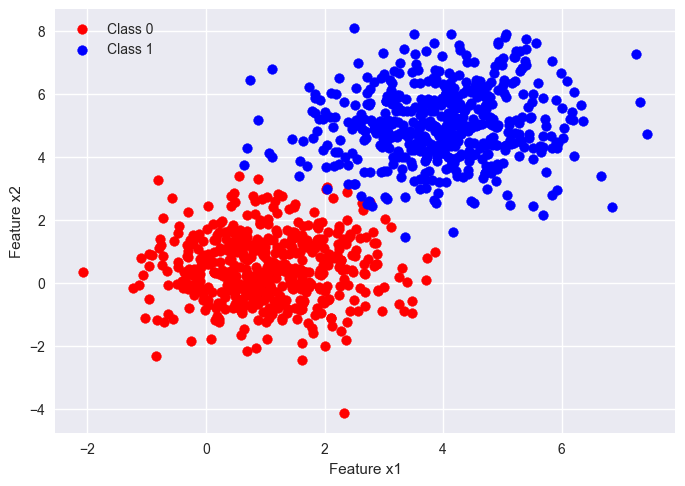

In [3]:
# Plot two clusters
plt.style.use('seaborn')
plt.scatter(distribution1[:,0], distribution1[:,1], color='red', label='Class 0')
plt.scatter(distribution2[:,0], distribution2[:,1], color='blue', label='Class 1')
plt.xlabel("Feature x1")
plt.ylabel("Feature x2")
plt.legend()
plt.show()

In [4]:
data = np.zeros((1000, 3)) # total 1000 examples of two clusters combined, each with two features & 1 output class
data[:500, :2] = distribution1
data[:500, -1] = 0
data[500:, :2] = distribution2
data[500:, -1] = 1


In [5]:
# randomly shuffle data
np.random.shuffle(data)
print(data[:10])

[[ 6.19320013  5.17596588  1.        ]
 [ 2.87615594  4.75512039  1.        ]
 [ 4.88483536  4.94319749  1.        ]
 [ 3.06082893  4.99035384  1.        ]
 [ 3.25590986  5.90630326  1.        ]
 [ 0.53278203  0.97977043  0.        ]
 [ 1.64495004 -0.62994146  0.        ]
 [ 4.81382621  3.49381046  1.        ]
 [ 6.32529335  5.6558655   1.        ]
 [ 0.56623848  1.59189948  0.        ]]


In [6]:
# Divide the data into train and test part
split = int(0.8 * data.shape[0])
X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test = data[split:,-1]
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(800, 2) (200, 2) (800,) (200,)


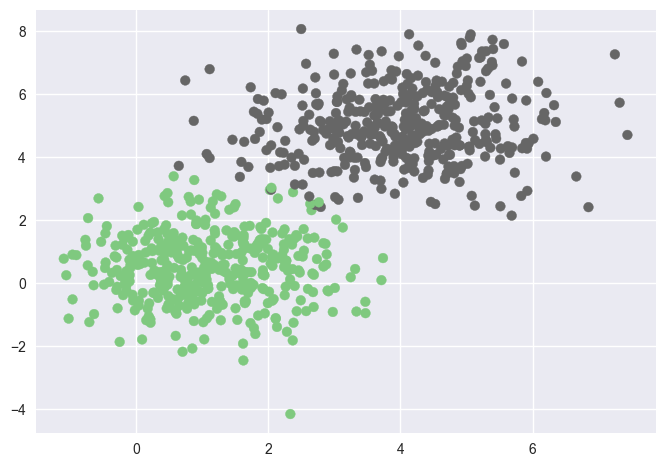

In [7]:
# Plot the training data and normalise it
plt.scatter(X_train[:,0], X_train[:,1],c=Y_train, cmap=plt.cm.Accent) # c - color allocated based on the sequence given in c # cmap - color maps
plt.show()

In [8]:
# Data Normalisation

# mean of each feature x1 and x2
x_mean = X_train.mean(axis=0) # mean of 800 examples for both features - return mean of x1 and mean of x2
x_std = X_train.std(axis=0)# std of 800 examples for both features

# apply the transformation 
X_train_norm = (X_train - x_mean)/x_std
print(x_std)
print(x_mean)

[1.8006854  2.52632994]
[2.55118778 2.76533846]


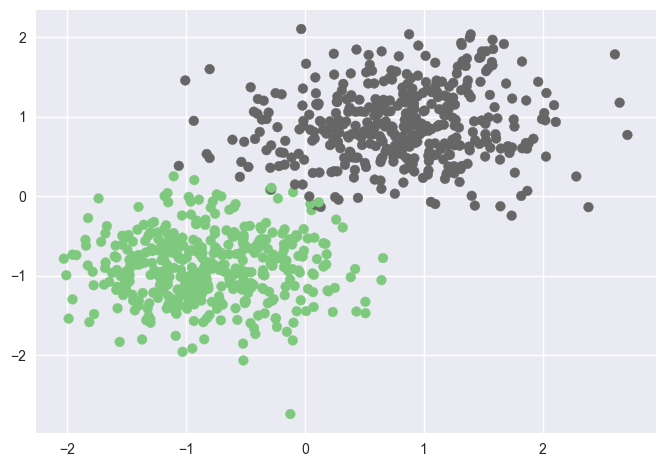

In [9]:
# Plot the normalized training data 
plt.scatter(X_train_norm[:,0], X_train_norm[:,1],c=Y_train, cmap=plt.cm.Accent)
plt.show()

In [10]:
# apply the same transformation on the test data. Despite the fact that test data could have different mean and std
# test data must be still shifted by the same amount as train data
# Because, this will NOT change the relative distribution of test data. Line computed based on train data and not test data.
X_test_norm = (X_test - x_mean)/x_std




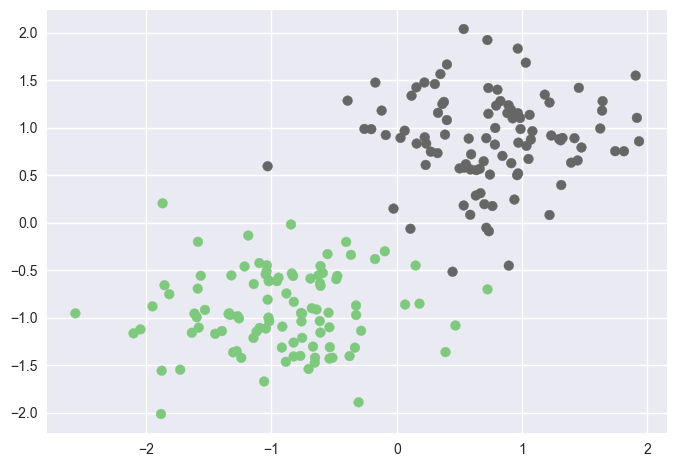

In [11]:
# Plot the normalized test data 
plt.scatter(X_test_norm[:,0], X_test_norm[:,1],c=Y_test, cmap=plt.cm.Accent)
plt.show()

# Note: norm is thus done for both clusters together. Whole data for both fe is centered around mean = 0, std = 1 approx 

In [12]:
X_train_norm.mean(axis=0) # values will be close to 0 for ENTIRE data

array([5.03486142e-16, 1.36224365e-15])

In [13]:
X_train_norm.std(axis=0) # values will be close to 1 for ENTIRE data

array([1., 1.])

In [14]:
#######################################################

LOGISTIC REGRESSION IMPLEMENTATION

In [15]:
def sigmoid(x): 
    return 1.0/(1.0 + np.exp(-x))
def hypothesis(X, theta): # this is h_theta(x) = g(theta.X) = sigmoid(theta.X) = sigmoid(log_odds) ### theta.X = log_odds
    # log_odds is the projected point of each example on the candidate line 
    # We transform log_odds of each example on the candidate line to a squiggle - 
    # -----> by taking sigmoid of log_odds - and then compute Max. Likelihood or loss generated by this new squiggle
    # sigmoid(log_odds) = confidence for each example point = h_theta(x)
    # Max. Likelihood = Prob of each example point on squiggle given theta line = P(X;theta)
    #                 = h_theta(x) when y=1
    #                   Or,
    #                   1-h_theta(x) when y=0 -> because if confidence = h_theta(x) = 0.1 for y=1 cluster -> which means confidence = 0.9 for y=0 cluster.

    """
    X entire array - m, n+1
    theta - np.array - n+1, 1
    """
    return sigmoid(np.dot(X, theta))

[-100.          -89.47368421  -78.94736842  -68.42105263  -57.89473684
  -47.36842105  -36.84210526  -26.31578947  -15.78947368   -5.26315789
    5.26315789   15.78947368   26.31578947   36.84210526   47.36842105
   57.89473684   68.42105263   78.94736842   89.47368421  100.        ]


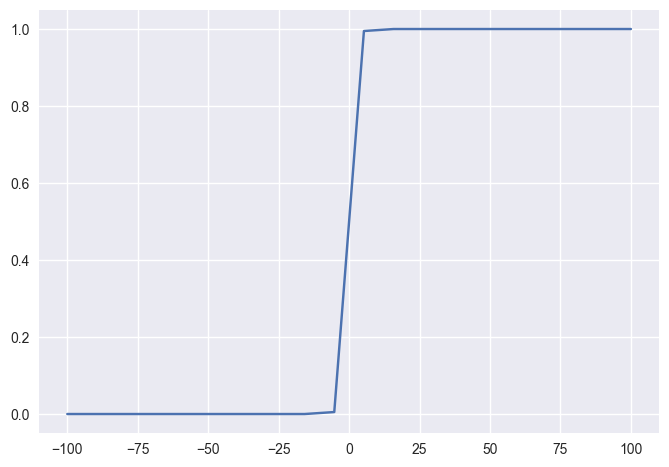

In [16]:
# Learn about sigmoid, Use sigmoid fn because if point z is closer to the line or far away from the hypothesis line, 
# we want to note different confidence levels and NOT just know to which binary class it belongs.
a = np.linspace(-100, 100, 20)
print(a)
plt.plot(a, sigmoid(a))
plt.show()

[-10.          -8.94736842  -7.89473684  -6.84210526  -5.78947368
  -4.73684211  -3.68421053  -2.63157895  -1.57894737  -0.52631579
   0.52631579   1.57894737   2.63157895   3.68421053   4.73684211
   5.78947368   6.84210526   7.89473684   8.94736842  10.        ]


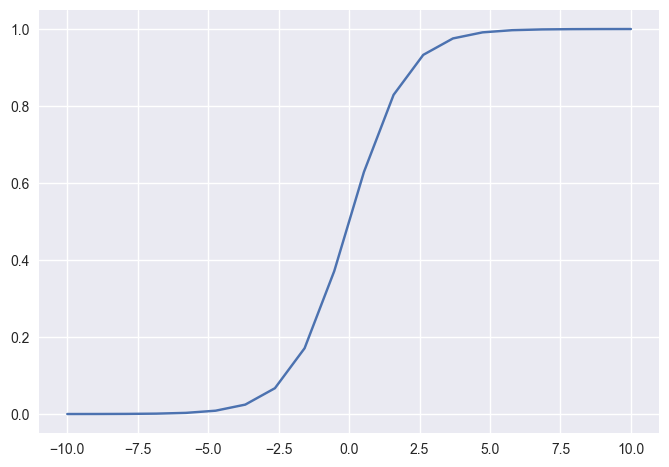

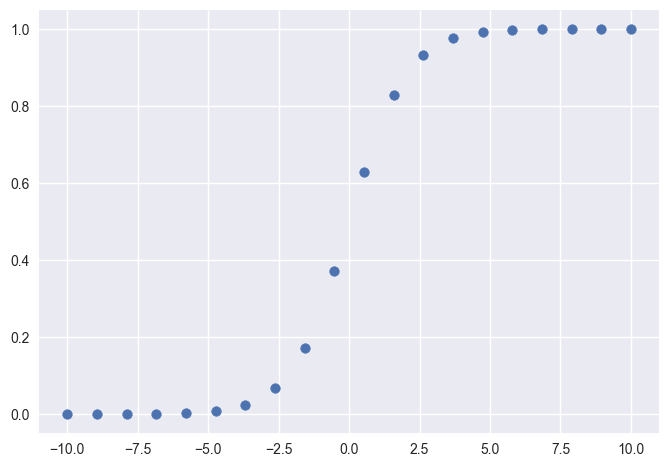

In [17]:
# Learn about sigmoid, smaller dataset makes curve smooth
a = np.linspace(-10, 10, 20)
print(a)
plt.plot(a, sigmoid(a))
plt.show()
plt.scatter(a, sigmoid(a))
plt.show()

In [18]:
# Log loss / Binary entropy
# Let's say we have two Prob Distributions for these 5 examples below
# y = 1 0 1 1 0
# h_theta_xi = PD1 = 0.9 0.1 0.99 0.82 0.1
# h_theta_xi = PD2 = 0.5 0.5 0.6  0.4  0.3
# This loss fn help acheive prediction as PD1 which is as close to the real prob distr.
# For y class = 1 => big hypothesis(confidence) number means log of (close to 1) = close to 0 loss
# For y class = 0 => very small hypothesis(confidence) number means log of (1 - close to 0) = close to 0 loss
# that's why this fn is the loss fn and is a convex fn
# binary class entropy is a special case of categorical cross entropy
def error(X, Y, theta):
    """
    params:
    X - m, n+1
    Y - m, 1
    theta - n+1, 1
    return:
    scale_value = loss
    """
    m = X.shape[0]
    hypothesis_ = hypothesis(X, theta)
    log_hypothesis = np.log(hypothesis_)
    # log_one_minus_hypothesis = np.log(1 - hypothesis_)

    e = -1 * (np.mean(Y * log_hypothesis + ((1-Y) * np.log(1 - hypothesis_)))) # as we change the candidate line, we will get different loss
    return e
    

In [19]:
def gradient(X, Y, theta): # Gradient means "Partial derivatives of loss fn w.r.t. theta for all theta values"
    """
    params:
    X - m, n+1
    Y - m, 1
    theta - n+1, 1
    return:
    gradient_vector = n+1, 1
    """
    m = X.shape[0]
    hypothesis_ = hypothesis(X, theta)
    return -(np.dot(X.T, (Y - hypothesis_)))/m

In [20]:
def gradient_descent(X, Y, lr = 0.1, max_iter=500):
    n = X.shape[1] # number of features
    theta = np.zeros((n,1))
    error_list = []
    for i in range(max_iter):
        err = error(X, Y, theta)
        error_list.append(err)
        grad = gradient(X, Y, theta)
        # update the candidate line by updating the theta as below
        theta = theta - lr * grad
    return theta, error_list


In [21]:
m = X_train_norm.shape[0]
ones = np.ones((m,1))
X_train_with_bias = np.hstack((ones, X_train_norm))
print(X_train_with_bias.shape)
print(X_train_with_bias)
print(Y_train.shape)
Y_train = Y_train.reshape((-1,1))
print(Y_train.shape)

(800, 3)
[[ 1.          2.02257004  0.95420134]
 [ 1.          0.18046914  0.7876176 ]
 [ 1.          1.29597739  0.86206437]
 ...
 [ 1.          0.82143877  0.59764028]
 [ 1.          0.38192856  0.48839194]
 [ 1.         -0.98882417 -1.03929675]]
(800,)
(800, 1)


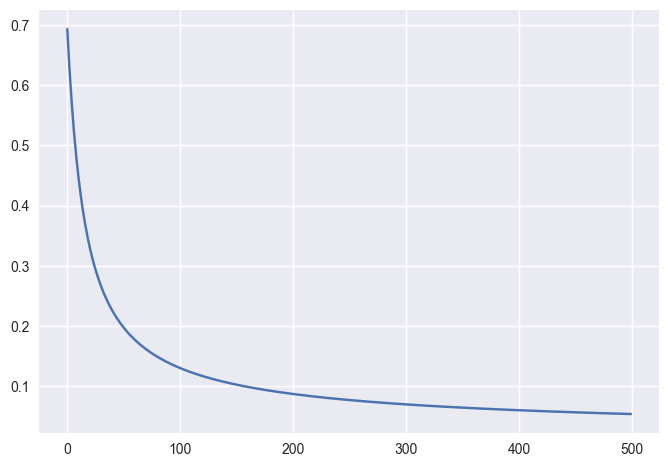

[0.6931471805599452, 0.6578376718520431, 0.6255078555400803, 0.5958901680049093, 0.5687326044055976, 0.5438010608944307, 0.520880427627956, 0.49977473298568326, 0.4803066136894239, 0.4623163414397976, 0.4456605874368547, 0.43021105975102686, 0.41585310889977334, 0.4024843653771512, 0.39001344892709383, 0.378358771961548, 0.36744744739714563, 0.3572143030716158, 0.34760099973673514, 0.33855524655509883, 0.3300301064019932, 0.321983382610862, 0.3143770787569553, 0.3071769234079376, 0.3003519523180724, 0.2938741411946219, 0.2877180828505558, 0.281860703232585, 0.27628101145215656, 0.2709598795356548, 0.26587984814281784, 0.26102495497838085, 0.2563805830432577, 0.2519333262418769, 0.24767087018612932, 0.24358188631852942, 0.2396559377223642, 0.23588339519925408, 0.2322553623787681, 0.2287636087842175, 0.22540050991678018, 0.2221589935395705, 0.21903249144670403, 0.21601489609200436, 0.21310052152967068, 0.21028406818661666, 0.20756059104471433, 0.2049254708620598, 0.2023743881066652, 0.19

In [24]:
theta, error_list = gradient_descent(X_train_with_bias, Y_train)
plt.plot(error_list)
plt.show()
print(error_list)

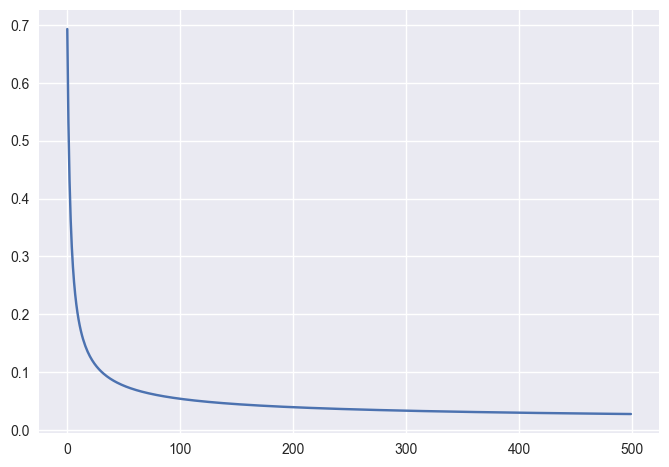

[0.6931471805599452, 0.5319952023077001, 0.43081695932263697, 0.36380973230521735, 0.31677282426582737, 0.2820730348953043, 0.25543241597538646, 0.23431791058007537, 0.2171492414256396, 0.20289442729801258, 0.19085267779003015, 0.18053198225085582, 0.171576922015757, 0.1637243696982813, 0.15677533158757595, 0.15057648928240053, 0.1450077651329162, 0.13997374074213728, 0.13539760571743215, 0.13121680760830506, 0.12737987010652552, 0.12384402902631322, 0.12057345074301389, 0.11753787208521302, 0.11471154961104725, 0.11207243902317178, 0.10960154786980332, 0.10728242019657955, 0.10510072272298081, 0.10304390988943596, 0.10110095072794714, 0.09926210460050246, 0.09751873586755139, 0.09586315979754483, 0.09428851371996134, 0.0927886487077851, 0.09135803805757638, 0.08999169959276042, 0.08868512940429935, 0.08743424510339917, 0.0862353370235947, 0.08508502609701886, 0.0839802273588656, 0.08291811821784507, 0.08189611077859713, 0.08091182762209932, 0.07996308054788057, 0.0790478518618453, 0.0

In [26]:
theta, error_list = gradient_descent(X_train_with_bias, Y_train, lr=0.5) 
plt.plot(error_list)
plt.show()
print(error_list)
# you'll observe sharp decrease in error when we increase the learning rate.

In [27]:
Y_train.shape
Y_train

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],

In [30]:
# In GD, we can improve GD by doing this - 
# when Delta Error is very small, stop the loop, OR,
# when all values of theta(theta for each feature) changes by a very small amount, stop the loop.

Visualise Decision Surface

[]

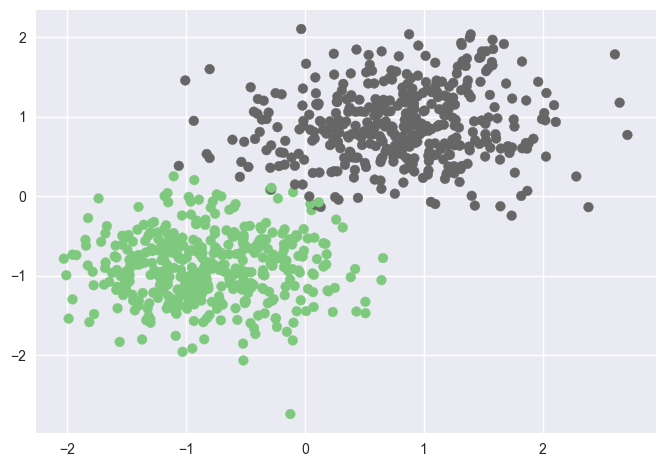

In [36]:
plt.scatter(X_train_norm[:,0], X_train_norm[:,1], c = Y_train.reshape((-1,)), cmap = plt.cm.Accent)
plt.plot()

[]

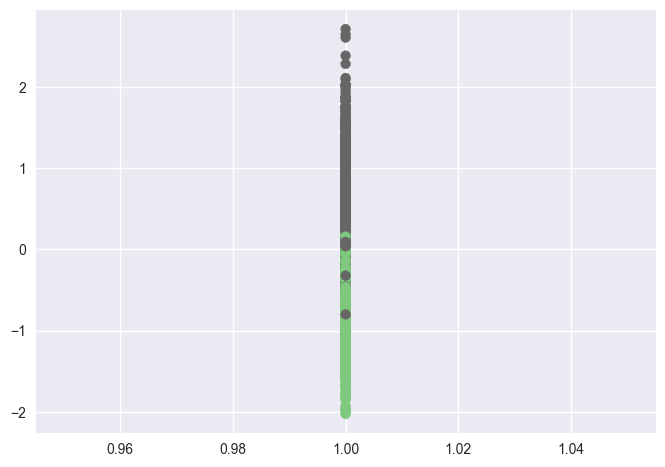

In [37]:
plt.scatter(X_train_with_bias[:,0], X_train_with_bias[:,1], c = Y_train.reshape((-1,)), cmap = plt.cm.Accent)
plt.plot()

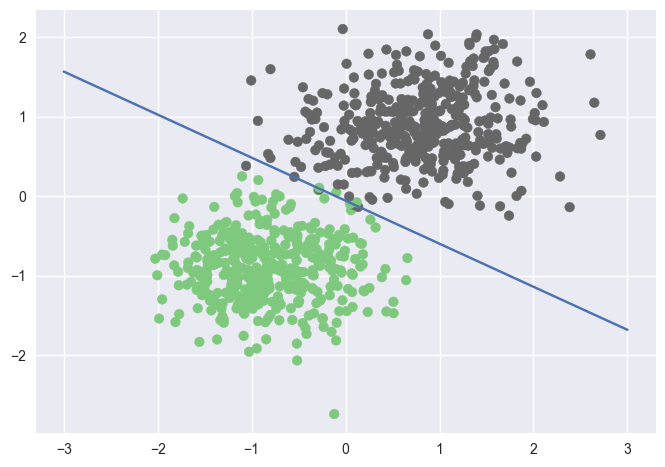

In [40]:
# Y_predicted = hypothesis(X_train_with_bias, theta)

# Assume x1 feature a range of values, then compute x2 values based on given line - theta params

x1 = np.arange(-3, 4)
x2 = -(theta[0] + theta[1]*x1)/theta[2]

plt.plot(x1, x2)
plt.scatter(X_train_norm[:,0], X_train_norm[:,1], c = Y_train.reshape((-1,)), cmap = plt.cm.Accent)
plt.show()

# this is how we visualise decision surface

Predictions & Accuracy

In [42]:
X_test_with_bias = np.hstack((np.ones((X_test_norm.shape[0], 1)), X_test_norm))
print(X_test_with_bias.shape)
print(X_test_with_bias[:3, :])

(200, 3)
[[ 1.         -0.88522413 -1.4662598 ]
 [ 1.         -0.61409694 -1.03717505]
 [ 1.         -0.51344945 -1.42357088]]


In [48]:
def predict(X, theta):
    hypothesis_ = hypothesis(X, theta) # holds the confidence score
    print(hypothesis_[:5,:])
    output = np.zeros(hypothesis_.shape)
    output[hypothesis_ > 0.5] = 1
    output = output.astype('int')
    return output

predict_test_data = predict(X_test_with_bias, theta)
predict_train_data = predict(X_train_with_bias, theta)

[[7.15361072e-05]
 [1.31146419e-03]
 [2.45253969e-04]
 [1.33020520e-03]
 [9.99307296e-01]]
[[0.99997602]
 [0.99150559]
 [0.99972158]
 [0.99597351]
 [0.99951914]]


In [56]:
def accuracy(actual, pred):
    actual = actual.reshape((-1,1))
    accuracy_ = np.sum(actual == pred) / actual.shape[0]
    return accuracy_ * 100

In [57]:
accuracy(Y_train.astype('int'), predict_train_data)

99.125

In [58]:
accuracy(Y_test.astype('int'), predict_test_data)

99.5

Use SK-Learn

In [65]:
from sklearn.linear_model import LogisticRegression
# LogisticRegression can only do linear classification. For non-linear boundaries, we will use svm, neural networks.
model = LogisticRegression()
model.fit(X_train_norm, Y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [66]:
theta0_sklearn = model.intercept_
thetaCoeffs_sklearn = model.coef_

print(theta0_sklearn, thetaCoeffs_sklearn)
print(theta[0], theta[1], theta[2])

[0.26376236] [[2.46789368 4.97405468]]
[0.28571378] [2.73421972] [5.05405194]


In [68]:
model.score(X_train_norm, Y_train)

0.99125

In [69]:
model.score(X_test_norm, Y_test)

0.995

In [70]:
y_test_predict_sklearn = model.predict(X_test_norm)

In [72]:
print(y_test_predict_sklearn[:20])

[0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0.]
